### Image Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Input, Flatten
from keras.preprocessing import image
from keras.models import Model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.display import Image, display

In [ ]:
!nvidia-smi

Fri May  6 17:39:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

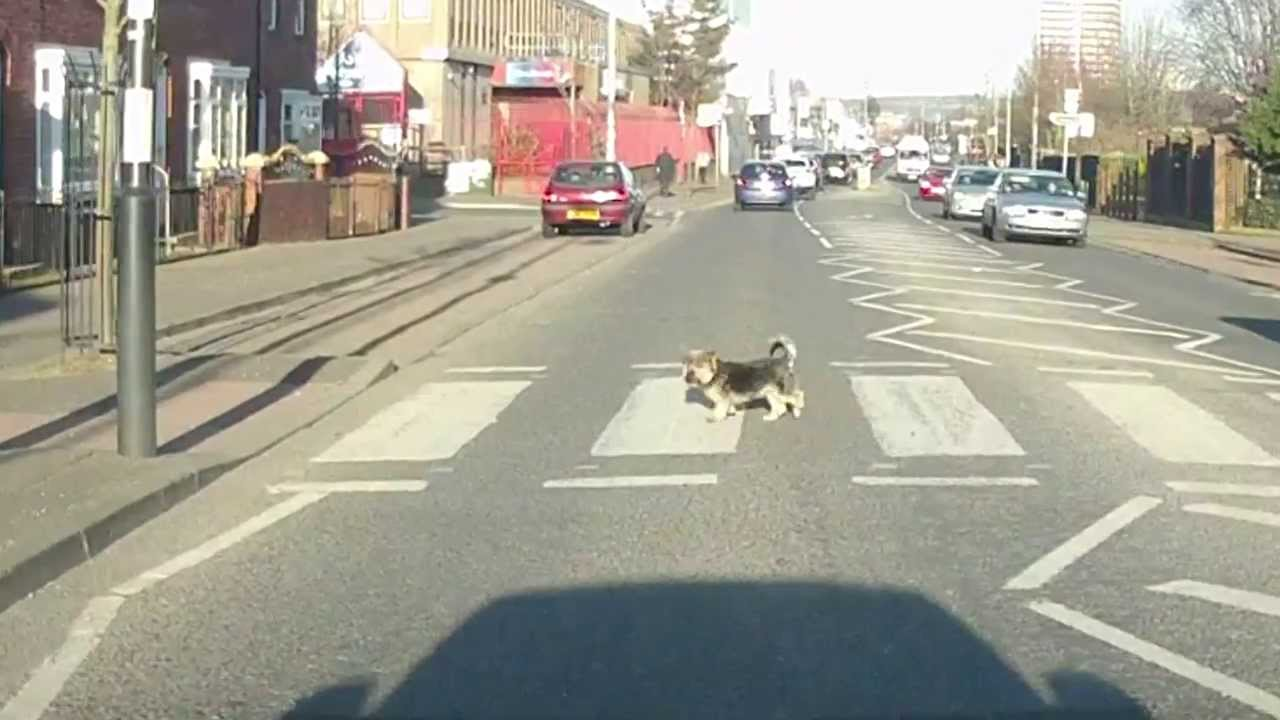

In [ ]:
# Dog Image
display(Image('/content/drive/MyDrive/Naveen Images/Train/Dogs/image_1.jpeg'))

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Naveen Images/Train'
test_path = '/content/drive/MyDrive/Naveen Images/Test'

In [ ]:
train_datagen = image.ImageDataGenerator(rescale = 1./255)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 94 images belonging to 4 classes.
Found 24 images belonging to 4 classes.


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = 4
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
steps, valid_steps = len(train_set), len(test_set)
steps, valid_steps

(2, 1)

In [ ]:
history = model.fit(train_set, validation_data=test_set, epochs=25)

Epoch 1/25
2/2 [==============================] - 32s 17s/step - loss: 2.1391 - accuracy: 0.3191 - val_loss: 1.0465 - val_accuracy: 0.5417
Epoch 2/25
2/2 [==============================] - 2s 1s/step - loss: 0.9215 - accuracy: 0.7021 - val_loss: 1.6844 - val_accuracy: 0.4583
Epoch 3/25
2/2 [==============================] - 2s 2s/step - loss: 0.8032 - accuracy: 0.6489 - val_loss: 0.7182 - val_accuracy: 0.7500
Epoch 4/25
2/2 [==============================] - 2s 1s/step - loss: 0.3380 - accuracy: 0.9362 - val_loss: 1.1653 - val_accuracy: 0.5417
Epoch 5/25
2/2 [==============================] - 2s 1s/step - loss: 0.4973 - accuracy: 0.8191 - val_loss: 0.8465 - val_accuracy: 0.7083
Epoch 6/25
2/2 [==============================] - 2s 1s/step - loss: 0.2164 - accuracy: 0.9149 - val_loss: 0.7268 - val_accuracy: 0.7500
Epoch 7/25
2/2 [==============================] - 2s 1s/step - loss: 0.0889 - accuracy: 0.9894 - val_loss: 0.8721 - val_accuracy: 0.6250
Epoch 8/25
2/2 [=======================

In [ ]:
import matplotlib.pyplot as plt

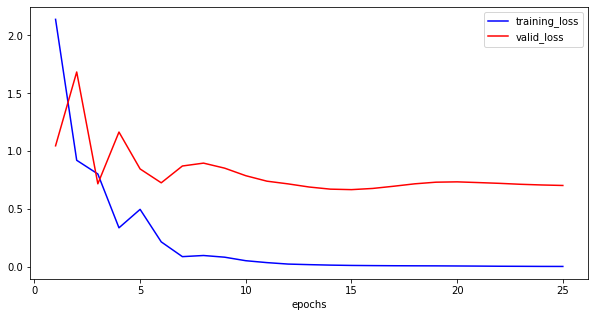

In [ ]:
# Training loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 26)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'b',label='training_loss')
plt.plot(epochs, val_loss, 'r', label='valid_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

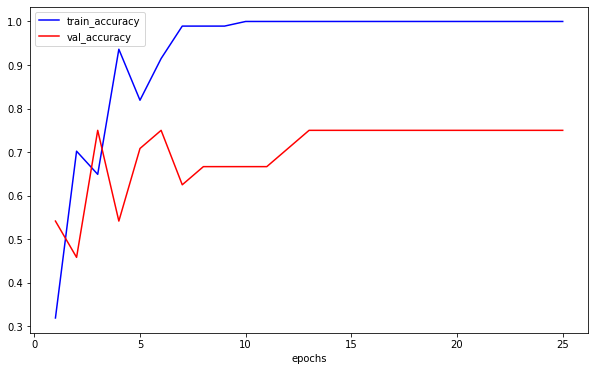

In [ ]:
# Training accuracy and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'b',label='train_accuracy')
plt.plot(epochs, val_accuracy, 'r', label='val_accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
# test predictions
len(test_set)

1

In [ ]:
y_true = []
y_pred = []

In [ ]:
for i in range(1):
  x, y = test_set[i]
  y_true.extend([np.argmax(i) for i in y])
  y_pred.extend([np.argmax(i) for i in model.predict(x)])

In [ ]:
len(y_true), len(y_pred)

(24, 24)

In [ ]:
labels = list(train_set.class_indices.keys())
labels

['Cows', 'Deers', 'Dogs', 'Leopards']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
pd.DataFrame(confusion_matrix(y_true, y_pred), index=['Cows', 'Deers', 'Dogs', 'Leopards'], columns=labels)

,Cows,Deers,Dogs,Leopards
Cows,4,1,0,1
Deers,1,4,0,1
Dogs,1,0,4,1
Leopards,0,0,0,6


In [ ]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_true, y_pred,average=None)

array([0.66666667, 0.66666667, 0.66666667, 1.        ])

In [ ]:
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

        Cows       0.67      0.67      0.67         6
       Deers       0.80      0.67      0.73         6
        Dogs       1.00      0.67      0.80         6
    Leopards       0.67      1.00      0.80         6

    accuracy                           0.75        24
   macro avg       0.78      0.75      0.75        24
weighted avg       0.78      0.75      0.75        24



In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
def predict_class(img_path):
  img=image.load_img(img_path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  img_data=preprocess_input(x)
  classes=model.predict(img_data)
  return classes

In [ ]:
predict_class('/content/drive/MyDrive/Images/Test/Dogs/image_10.jpeg')

array([[1.0000000e+00, 0.0000000e+00, 2.2376785e-15, 0.0000000e+00]],
      dtype=float32)

In [ ]:
model.save('/content/drive/MyDrive/Images/Models/model.h5')

## Object Detection

In [ ]:
train_annotation = pd.read_csv('/content/drive/MyDrive/Naveen Images/Annotations/train_annotations.csv')
test_annotations = pd.read_csv('/content/drive/MyDrive/Naveen Images/Annotations/test_annotations.csv')

In [ ]:
train_annotation.head()

,Dog,236,58,187,281,image_29.jpeg,540,360
0,Dog,7,14,209,204,image_28.jpeg,224,225
1,Dog,57,13,168,148,image_27.jpeg,309,163
2,Dog,86,2,116,166,image_26.jpeg,299,168
3,Dog,44,4,179,176,image_25.jpeg,275,183
4,Dog,16,17,424,351,image_22.jpeg,500,371


In [ ]:
train_annotation.columns = ['Label', 'x1', 'y1', 'x2', 'y2', 'file_path', 'image_resolution_x', 'image_resolution_y']

In [ ]:
train_annotation['Data_type'] = 'TRAIN'

In [ ]:
print(train_annotation.shape)
train_annotation.head()

(145, 9)


,Label,x1,y1,x2,y2,file_path,image_resolution_x,image_resolution_y,Data_type
0,Dog,7,14,209,204,image_28.jpeg,224,225,TRAIN
1,Dog,57,13,168,148,image_27.jpeg,309,163,TRAIN
2,Dog,86,2,116,166,image_26.jpeg,299,168,TRAIN
3,Dog,44,4,179,176,image_25.jpeg,275,183,TRAIN
4,Dog,16,17,424,351,image_22.jpeg,500,371,TRAIN


In [ ]:
x1_coordinate = []
y1_coordinate = []
x2_coordinate = []
y2_coordinate = []
for i in range(train_annotation.shape[0]):
  x1 = train_annotation['x1'].iloc[i]
  y1 = train_annotation['y1'].iloc[i]
  x2 = train_annotation['x2'].iloc[i]
  y2 = train_annotation['y2'].iloc[i]
  image_resolution_x = train_annotation['image_resolution_x'].iloc[i]
  image_resolution_y = train_annotation['image_resolution_y'].iloc[i]

  new_x2 = x1 + x2
  new_y2 = y1 + y2

  #new_x2 = x2
  #new_y2 = y2

  x1_coordinate.append(x1/image_resolution_x)
  y1_coordinate.append(y1/image_resolution_y)
  x2_coordinate.append(new_x2/image_resolution_x)
  y2_coordinate.append(new_y2/image_resolution_y)

In [ ]:
train_annotation['x1'] = x1_coordinate
train_annotation['y1'] = y1_coordinate
train_annotation['x2'] = x2_coordinate
train_annotation['y2'] = y2_coordinate

In [ ]:
print(train_annotation.shape)
train_annotation.head()

(145, 9)


,Label,x1,y1,x2,y2,file_path,image_resolution_x,image_resolution_y,Data_type
0,Dog,0.031250,0.062222,0.964286,0.968889,image_28.jpeg,224,225,TRAIN
1,Dog,0.184466,0.079755,0.728155,0.987730,image_27.jpeg,309,163,TRAIN
2,Dog,0.287625,0.011905,0.675585,1.000000,image_26.jpeg,299,168,TRAIN
3,Dog,0.160000,0.021858,0.810909,0.983607,image_25.jpeg,275,183,TRAIN
4,Dog,0.032000,0.045822,0.880000,0.991914,image_22.jpeg,500,371,TRAIN


In [ ]:
train_annotation['Label'].value_counts()

Cow        58
Deer       30
Dog        29
Leopard    28
Name: Label, dtype: int64

In [ ]:
outputs = []
folder_path = "/content/drive/MyDrive/Naveen Images/Train/"
for i in range(train_annotation.shape[0]):
  label = train_annotation['Label'].iloc[i]
  file_path = train_annotation['file_path'].iloc[i]
  new_file_path = folder_path + f'{label}s/'+ file_path 
  outputs.append(new_file_path)

In [ ]:
outputs[:2]

['/content/drive/MyDrive/Naveen Images/Train/Dogs/image_28.jpeg',
 '/content/drive/MyDrive/Naveen Images/Train/Dogs/image_27.jpeg']

In [ ]:
train_annotation['file_path'] = outputs

In [ ]:
print(train_annotation.shape)
train_annotation.head()

(145, 9)


,Label,x1,y1,x2,y2,file_path,image_resolution_x,image_resolution_y,Data_type
0,Dog,0.031250,0.062222,0.964286,0.968889,/content/drive/MyDrive/Naveen Images/Train/Dog...,224,225,TRAIN
1,Dog,0.184466,0.079755,0.728155,0.987730,/content/drive/MyDrive/Naveen Images/Train/Dog...,309,163,TRAIN
2,Dog,0.287625,0.011905,0.675585,1.000000,/content/drive/MyDrive/Naveen Images/Train/Dog...,299,168,TRAIN
3,Dog,0.160000,0.021858,0.810909,0.983607,/content/drive/MyDrive/Naveen Images/Train/Dog...,275,183,TRAIN
4,Dog,0.032000,0.045822,0.880000,0.991914,/content/drive/MyDrive/Naveen Images/Train/Dog...,500,371,TRAIN


In [ ]:
train = train_annotation[['Data_type', 'file_path', 'Label', 'x1', 'y1', 'x2', 'y2']].copy()

In [ ]:
print(train.shape)
train.head()

(145, 7)


,Data_type,file_path,Label,x1,y1,x2,y2
0,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.031250,0.062222,0.964286,0.968889
1,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.184466,0.079755,0.728155,0.987730
2,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.287625,0.011905,0.675585,1.000000
3,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.160000,0.021858,0.810909,0.983607
4,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.032000,0.045822,0.880000,0.991914


In [ ]:
test_annotations.head()

,Dog,540,439,88,54,image_10.jpeg,1280,960
0,Dog,642,444,32,57,image_10.jpeg,1280,960
1,Dog,661,454,49,43,image_10.jpeg,1280,960
2,Dog,750,436,43,55,image_10.jpeg,1280,960
3,Dog,316,446,64,90,image_10.jpeg,1280,960
4,Dog,206,430,55,67,image_10.jpeg,1280,960


In [ ]:
test_annotations.columns = ['Label', 'x1', 'y1', 'x2', 'y2', 'file_path', 'image_resolution_x', 'image_resolution_y']

In [ ]:
x1_coordinate = []
y1_coordinate = []
x2_coordinate = []
y2_coordinate = []
for i in range(test_annotations.shape[0]):
  x1 = test_annotations['x1'].iloc[i]
  y1 = test_annotations['y1'].iloc[i]
  x2 = test_annotations['x2'].iloc[i]
  y2 = test_annotations['y2'].iloc[i]
  image_resolution_x = test_annotations['image_resolution_x'].iloc[i]
  image_resolution_y = test_annotations['image_resolution_y'].iloc[i]

  new_x2 = x1 + x2
  new_y2 = y1 + y2

  #new_x2 = x2
  #new_y2 = y2

  x1_coordinate.append(x1/image_resolution_x)
  y1_coordinate.append(y1/image_resolution_y)
  x2_coordinate.append(new_x2/image_resolution_x)
  y2_coordinate.append(new_y2/image_resolution_y)

In [ ]:
test_annotations['x1'] = x1_coordinate
test_annotations['y1'] = y1_coordinate
test_annotations['x2'] = x2_coordinate
test_annotations['y2'] = y2_coordinate

In [ ]:
test_annotations['Data_type'] = 'TEST'

In [ ]:
print(test_annotations.shape)
test_annotations.head()

(37, 9)


,Label,x1,y1,x2,y2,file_path,image_resolution_x,image_resolution_y,Data_type
0,Dog,0.501563,0.462500,0.526563,0.521875,image_10.jpeg,1280,960,TEST
1,Dog,0.516406,0.472917,0.554688,0.517708,image_10.jpeg,1280,960,TEST
2,Dog,0.585938,0.454167,0.619531,0.511458,image_10.jpeg,1280,960,TEST
3,Dog,0.246875,0.464583,0.296875,0.558333,image_10.jpeg,1280,960,TEST
4,Dog,0.160938,0.447917,0.203906,0.517708,image_10.jpeg,1280,960,TEST


In [ ]:
test_annotations['Label'].value_counts()

Cow        13
Dog        10
Deer        8
Leopard     6
Name: Label, dtype: int64

In [ ]:
outputs = []
folder_path = "/content/drive/MyDrive/Naveen Images/Test/"
for i in range(test_annotations.shape[0]):
  label = test_annotations['Label'].iloc[i]
  file_path = test_annotations['file_path'].iloc[i]
  new_file_path = folder_path + f'{label}s/'+ file_path 
  outputs.append(new_file_path)

In [ ]:
outputs[:2]

['/content/drive/MyDrive/Naveen Images/Test/Dogs/image_10.jpeg',
 '/content/drive/MyDrive/Naveen Images/Test/Dogs/image_10.jpeg']

In [ ]:
test_annotations['file_path'] = outputs

In [ ]:
print(test_annotations.shape)
test_annotations.head()

(37, 9)


,Label,x1,y1,x2,y2,file_path,image_resolution_x,image_resolution_y,Data_type
0,Dog,0.501563,0.462500,0.526563,0.521875,/content/drive/MyDrive/Naveen Images/Test/Dogs...,1280,960,TEST
1,Dog,0.516406,0.472917,0.554688,0.517708,/content/drive/MyDrive/Naveen Images/Test/Dogs...,1280,960,TEST
2,Dog,0.585938,0.454167,0.619531,0.511458,/content/drive/MyDrive/Naveen Images/Test/Dogs...,1280,960,TEST
3,Dog,0.246875,0.464583,0.296875,0.558333,/content/drive/MyDrive/Naveen Images/Test/Dogs...,1280,960,TEST
4,Dog,0.160938,0.447917,0.203906,0.517708,/content/drive/MyDrive/Naveen Images/Test/Dogs...,1280,960,TEST


In [ ]:
test = test_annotations[['Data_type', 'file_path', 'Label', 'x1', 'y1', 'x2', 'y2']].copy()

In [ ]:
print(test.shape)
test.head()

(37, 7)


,Data_type,file_path,Label,x1,y1,x2,y2
0,TEST,/content/drive/MyDrive/Naveen Images/Test/Dogs...,Dog,0.501563,0.462500,0.526563,0.521875
1,TEST,/content/drive/MyDrive/Naveen Images/Test/Dogs...,Dog,0.516406,0.472917,0.554688,0.517708
2,TEST,/content/drive/MyDrive/Naveen Images/Test/Dogs...,Dog,0.585938,0.454167,0.619531,0.511458
3,TEST,/content/drive/MyDrive/Naveen Images/Test/Dogs...,Dog,0.246875,0.464583,0.296875,0.558333
4,TEST,/content/drive/MyDrive/Naveen Images/Test/Dogs...,Dog,0.160938,0.447917,0.203906,0.517708


In [ ]:
data = pd.concat([train, test])

In [ ]:
print(data.shape)
data.head()

(182, 7)


,Data_type,file_path,Label,x1,y1,x2,y2
0,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.031250,0.062222,0.964286,0.968889
1,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.184466,0.079755,0.728155,0.987730
2,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.287625,0.011905,0.675585,1.000000
3,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.160000,0.021858,0.810909,0.983607
4,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.032000,0.045822,0.880000,0.991914


In [ ]:
data['rand1'] = np.NaN
data['rand2'] = np.NaN

In [ ]:
data.head()

,Data_type,file_path,Label,x1,y1,x2,y2,rand1,rand2
0,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.031250,0.062222,0.964286,0.968889,NaN,NaN
1,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.184466,0.079755,0.728155,0.987730,NaN,NaN
2,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.287625,0.011905,0.675585,1.000000,NaN,NaN
3,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.160000,0.021858,0.810909,0.983607,NaN,NaN
4,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.032000,0.045822,0.880000,0.991914,NaN,NaN


In [ ]:
data = data[['Data_type', 'file_path', 'Label', 'x1', 'y1', 'rand1', 'rand2', 'x2', 'y2']]

In [ ]:
data.head()

,Data_type,file_path,Label,x1,y1,rand1,rand2,x2,y2
0,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.031250,0.062222,NaN,NaN,0.964286,0.968889
1,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.184466,0.079755,NaN,NaN,0.728155,0.987730
2,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.287625,0.011905,NaN,NaN,0.675585,1.000000
3,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.160000,0.021858,NaN,NaN,0.810909,0.983607
4,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.032000,0.045822,NaN,NaN,0.880000,0.991914


In [ ]:
data.to_csv('/content/drive/MyDrive/Naveen Images/Annotations/data.csv', header=False, index=False)

In [ ]:
!pip install -q --use-deprecated=legacy-resolver tflite-model-maker
!pip install -q pycocotools

     |████████████████████████████████| 616 kB 5.3 MB/s 
     |████████████████████████████████| 596 kB 45.7 MB/s 
     |████████████████████████████████| 840 kB 42.2 MB/s 
     |████████████████████████████████| 3.4 MB 35.6 MB/s 
     |████████████████████████████████| 6.4 MB 39.9 MB/s 
     |████████████████████████████████| 1.2 MB 42.2 MB/s 
     |████████████████████████████████| 1.1 MB 50.1 MB/s 
     |████████████████████████████████| 87 kB 6.8 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 1.1 MB 36.1 MB/s 
     |████████████████████████████████| 237 kB 53.8 MB/s 
     |████████████████████████████████| 120 kB 53.1 MB/s 
     |████████████████████████████████| 99 kB 9.3 MB/s 
     |████████████████████████████████| 47.8 MB 1.6 MB/s 
     |████████████████████████████████| 352 kB 51.2 MB/s 
     |████████████████████████████████| 462 kB 43.1 MB/s 
     |████████████████████████████████| 25.3 MB 1.6 MB/s 
     |███████████████

In [ ]:
import numpy as np
import os

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
spec = model_spec.get('efficientdet_lite0')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Naveen Images/Annotations/data.csv')
data.head()

,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dogs/image_28.jpeg,Dog,0.03125,0.06222222222222222,Unnamed: 5,Unnamed: 6,0.9642857142857143,0.9688888888888889
0,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.184466,0.079755,NaN,NaN,0.728155,0.987730
1,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.287625,0.011905,NaN,NaN,0.675585,1.000000
2,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.160000,0.021858,NaN,NaN,0.810909,0.983607
3,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.032000,0.045822,NaN,NaN,0.880000,0.991914
4,TRAIN,/content/drive/MyDrive/Naveen Images/Train/Dog...,Dog,0.145833,0.125000,NaN,NaN,0.504167,0.516667


In [ ]:
train_data, validation_data, test_data = object_detector.DataLoader.from_csv('/content/drive/MyDrive/Naveen Images/Annotations/data.csv')

In [ ]:
model = object_detector.create(train_data, model_spec=spec, batch_size=8, train_whole_model=True, validation_data=test_data)

Epoch 1/50
11/11 [==============================] - 61s 1s/step - det_loss: 1.7809 - cls_loss: 1.1422 - box_loss: 0.0128 - reg_l2_loss: 0.0634 - loss: 1.8443 - learning_rate: 0.0090 - gradient_norm: 1.2006 - val_det_loss: 1.7062 - val_cls_loss: 1.1225 - val_box_loss: 0.0117 - val_reg_l2_loss: 0.0634 - val_loss: 1.7696
Epoch 2/50
11/11 [==============================] - 9s 807ms/step - det_loss: 1.6735 - cls_loss: 1.1149 - box_loss: 0.0112 - reg_l2_loss: 0.0634 - loss: 1.7368 - learning_rate: 0.0100 - gradient_norm: 1.2978 - val_det_loss: 1.5651 - val_cls_loss: 1.0518 - val_box_loss: 0.0103 - val_reg_l2_loss: 0.0634 - val_loss: 1.6284
Epoch 3/50
11/11 [==============================] - 9s 809ms/step - det_loss: 1.5120 - cls_loss: 1.0216 - box_loss: 0.0098 - reg_l2_loss: 0.0634 - loss: 1.5753 - learning_rate: 0.0099 - gradient_norm: 1.8238 - val_det_loss: 1.3486 - val_cls_loss: 0.8949 - val_box_loss: 0.0091 - val_reg_l2_loss: 0.0634 - val_loss: 1.4120
Epoch 4/50
11/11 [==================

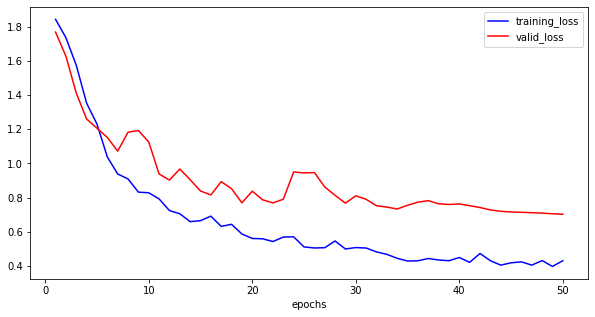

In [ ]:
# Training loss and validation loss
#loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1, 51)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'b',label='training_loss')
plt.plot(epochs, val_loss, 'r', label='valid_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_data)

1/1 [==============================] - 9s 9s/step



{'AP': 0.47942576,
 'AP50': 0.74249846,
 'AP75': 0.60284466,
 'AP_/Cow': 0.4508613,
 'AP_/Deer': 0.46894196,
 'AP_/Dog': 0.3779328,
 'AP_/Leopard': 0.619967,
 'APl': 0.62835765,
 'APm': 0.15547068,
 'APs': 0.5375963,
 'ARl': 0.68666667,
 'ARm': 0.2711111,
 'ARmax1': 0.43903846,
 'ARmax10': 0.5575,
 'ARmax100': 0.5651923,
 'ARs': 0.7}

In [ ]:
model.export(export_dir='/content/drive/MyDrive/Images/Models/object_detection_model.tflite')

In [ ]:
model_path = '/content/drive/MyDrive/Images/Models/object_detection_model.tflite/model.tflite'

In [ ]:
model.evaluate_tflite(model_path, test_data)

24/24 [==============================] - 66s 3s/step



{'AP': 0.46135384,
 'AP50': 0.7314863,
 'AP75': 0.53069305,
 'AP_/Cow': 0.44859782,
 'AP_/Deer': 0.40919378,
 'AP_/Dog': 0.38168317,
 'AP_/Leopard': 0.6059406,
 'APl': 0.56075495,
 'APm': 0.14983499,
 'APs': 0.7019802,
 'ARl': 0.5758333,
 'ARm': 0.17777778,
 'ARmax1': 0.42040065,
 'ARmax10': 0.48626602,
 'ARmax100': 0.4901122,
 'ARs': 0.7}

In [ ]:
!pip show opencv-python-headless

Name: opencv-python-headless
Version: 4.1.1.26
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: None
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy
Required-by: tf-models-official


In [ ]:
!pip show opencv-python

Name: opencv-python
Version: 4.1.1.26
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: None
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy
Required-by: imgaug, dopamine-rl, albumentations


In [ ]:
!pip uninstall opencv-python
!pip install opencv-python==4.1.1.26y
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.1.1.26

In [ ]:
import cv2

from PIL import Image

model_path = '/content/drive/MyDrive/Images/Models/object_detection_model.tflite'

# Load the labels into a list
classes = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  classes[label_id-1] = label_name

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

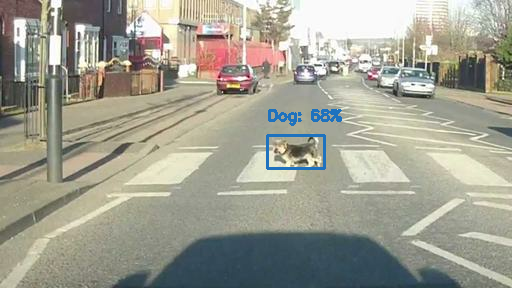

In [ ]:
INPUT_IMAGE_URL = "/content/drive/MyDrive/Images/Train/Dogs/image_1.jpeg"
DETECTION_THRESHOLD = 0.3

TEMP_FILE = '/content/drive/MyDrive/Images/Train/Dogs/image_1.jpeg'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'JPEG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)